In [1]:
import sys, os, copy, re, random
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1)
sns.set_style("whitegrid")
#palette = list(mcolors.TABLEAU_COLORS.keys())
#palette.extend(['salmon', 'teal','yellowgreen'])
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")
palette = sns.color_palette(as_cmap=True)

In [6]:
# Read data:
df = list(pd.read_excel('plotting_data.xlsx', sheet_name=None).values())[0]
df

,Rescue,Inhibitor,Cell line,Log2 cells,Prlfr,Mean cell size,Mean cell size norm
0,Vehicle,Vehicle,H1299,19.465829,1.090409,5281,1.000000
1,Guanine,Vehicle,H1299,18.751073,0.852157,7008,1.327021
2,Adenine,Vehicle,H1299,19.484044,1.096480,5323,1.007953
3,G+A,Vehicle,H1299,19.404368,1.069922,5337,1.010604
4,Vehicle,Rotenone,H1299,17.780207,0.528535,7857,1.487786
5,Guanine,Rotenone,H1299,17.166438,0.323945,9927,1.879758
6,Adenine,Rotenone,H1299,17.876757,0.560718,7146,1.353153
7,G+A,Rotenone,H1299,18.068547,0.624648,6879,1.302594
8,Vehicle,Oligomycin,H1299,18.251187,0.685528,6903,1.307139
9,Guanine,Oligomycin,H1299,17.791061,0.532153,9211,1.744177


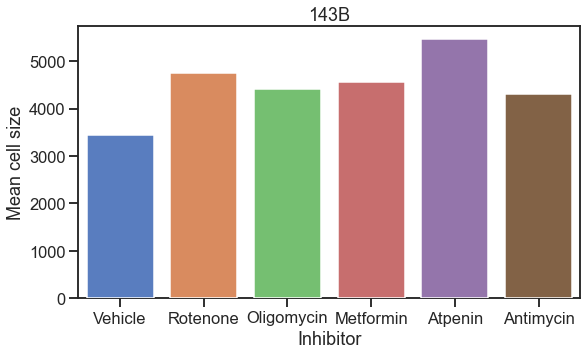

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(9, 5))
cell_line_mask = (df['Cell line'] == '143B') & (df['Rescue'] == 'Vehicle')

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size', zorder=20)
ax1.set_title('143B');
ax1.set_ylabel('Mean cell size');


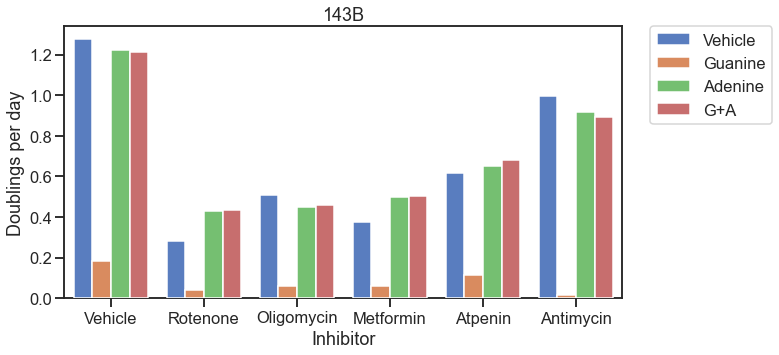

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Prlfr', hue='Rescue', zorder=20)
ax1.set_title('143B');
ax1.set_ylabel('Doublings per day');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


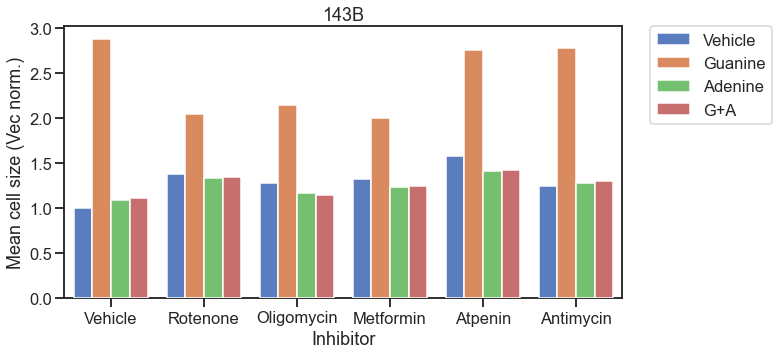

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size norm', hue='Rescue', zorder=20)
ax1.set_title('143B');
ax1.set_ylabel('Mean cell size (Vec norm.)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

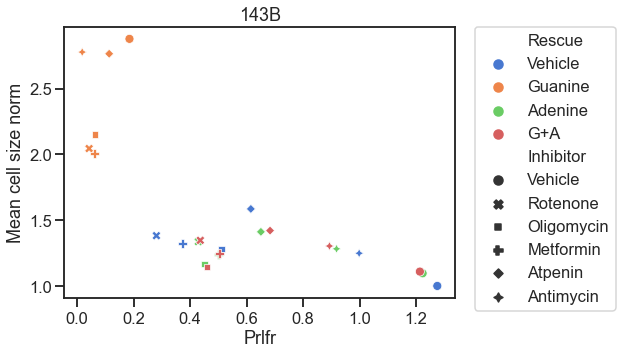

In [36]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
cell_line_mask = df['Cell line'] == '143B'

g1 = sns.scatterplot(ax=ax1, data=df[cell_line_mask], y='Mean cell size norm', x='Prlfr', hue='Rescue', style='Inhibitor', zorder=20)
ax1.set_title('143B');
#ax1.set_ylabel('Mean cell size (Vec norm.)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

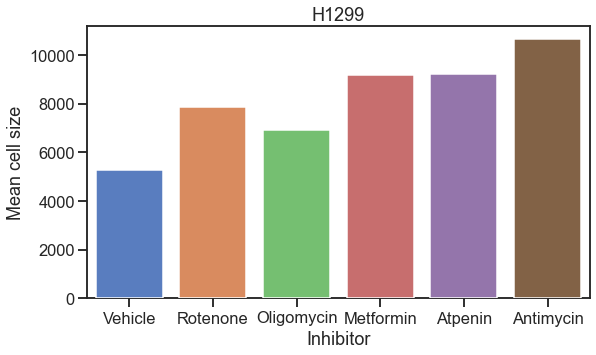

In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(9, 5))
cell_line_mask = (df['Cell line'] == 'H1299') & (df['Rescue'] == 'Vehicle')

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size', zorder=20)
ax1.set_title('H1299');
ax1.set_ylabel('Mean cell size');


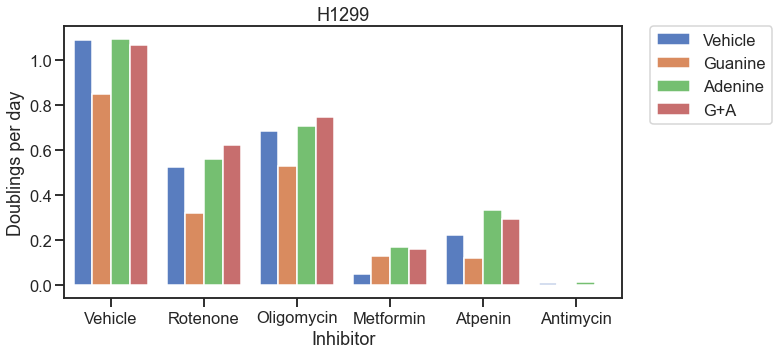

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == 'H1299'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Prlfr', hue='Rescue', zorder=20)
ax1.set_title('H1299');
ax1.set_ylabel('Doublings per day');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


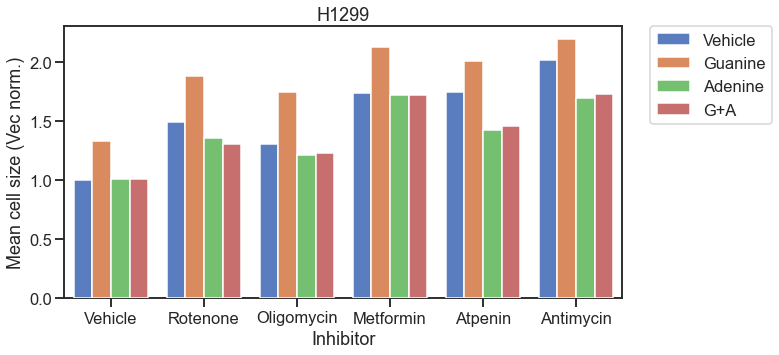

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
cell_line_mask = df['Cell line'] == 'H1299'

g1 = sns.barplot(ax=ax1, data=df[cell_line_mask], x='Inhibitor', y='Mean cell size norm', hue='Rescue', zorder=20)
ax1.set_title('H1299');
ax1.set_ylabel('Mean cell size (Vec norm.)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

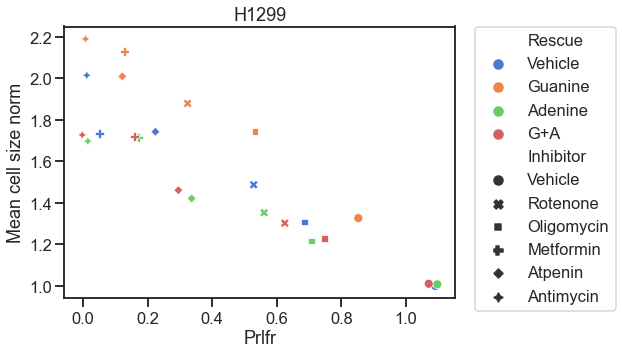

In [37]:
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
cell_line_mask = df['Cell line'] == 'H1299'

g1 = sns.scatterplot(ax=ax1, data=df[cell_line_mask], y='Mean cell size norm', x='Prlfr', hue='Rescue', style='Inhibitor', zorder=20)
ax1.set_title('H1299');
#ax1.set_ylabel('Mean cell size (Vec norm.)');

# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

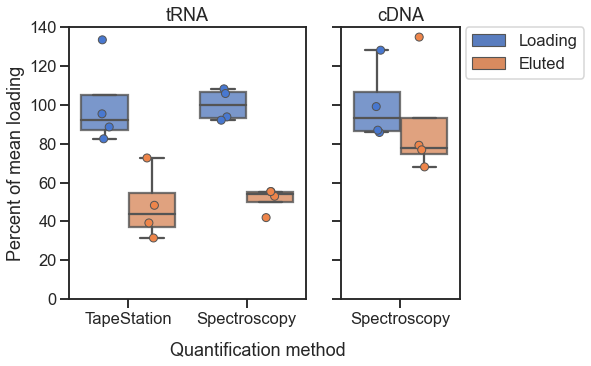

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5), sharey=True, gridspec_kw={'width_ratios': [2, 1]})
tRNA_mask = df['Nuc_type'] == 'tRNA'
g1 = sns.boxplot(ax=ax1, data=df[tRNA_mask], x='Method', y='Percent', hue='Type', zorder=20, fliersize=0, boxprops=dict(alpha=.8))
g2 = sns.stripplot(ax=ax1, data=df[tRNA_mask], x='Method', y='Percent', hue='Type', dodge=True, zorder=30, size=8, edgecolor='gray', linewidth=1)
ax1.set_title('tRNA');
ax1.set(ylim=(0, 140))
ax1.set_xlabel('')
ax1.set_ylabel('Percent of mean loading');
ax1.get_legend().remove()


cDNA_mask = df['Nuc_type'] == 'cDNA'
g3 = sns.boxplot(ax=ax2, data=df[cDNA_mask], x='Method', y='Percent', hue='Type', zorder=20, fliersize=0, boxprops=dict(alpha=.8))
g4 = sns.stripplot(ax=ax2, data=df[cDNA_mask], x='Method', y='Percent', hue='Type', dodge=True, zorder=30, size=8, edgecolor='gray', linewidth=1)
ax2.set_title('cDNA');
ax2.get_legend().remove()
ax2.set_ylabel('')
ax2.set_xlabel('')


# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.text(0.5, -0.03, 'Quantification method', ha='center')
fig.savefig('gel_elution_tRNA.pdf', bbox_inches='tight');